In [93]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd 
import numpy as np 

# Load
df = pd.read_csv("historical_data.csv", index_col=0)



In [94]:
df.head()

,province,carcolour,hp,gender,age,lic_years,pastclaims,claims,exp_years
id,,,,,,,,,
1,MP,Blue,74,0,18,0,0,0,0.005476
2,GP,White,283,0,81,63,1,0,0.616016
3,WC,Green,122,0,54,35,1,1,0.919918
4,WC,Black,172,0,39,21,1,0,0.361396
5,LIM,White,161,0,54,35,0,0,1.160849


In [95]:
df.claims.describe()

count    80000.000000
mean         0.139937
std          0.382827
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: claims, dtype: float64

In [96]:
var = 0.382827 ** 2
var 

0.146556511929

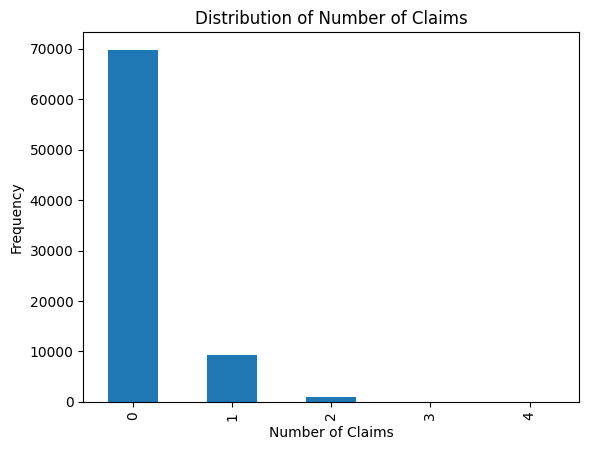

In [97]:
# plot number of claims equalling 1, 2, 3 etc
import matplotlib.pyplot as plt
df['claims'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Claims')
plt.show()

C:\Users\Armandt\AppData\Local\Temp\ipykernel_31704\1018056027.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


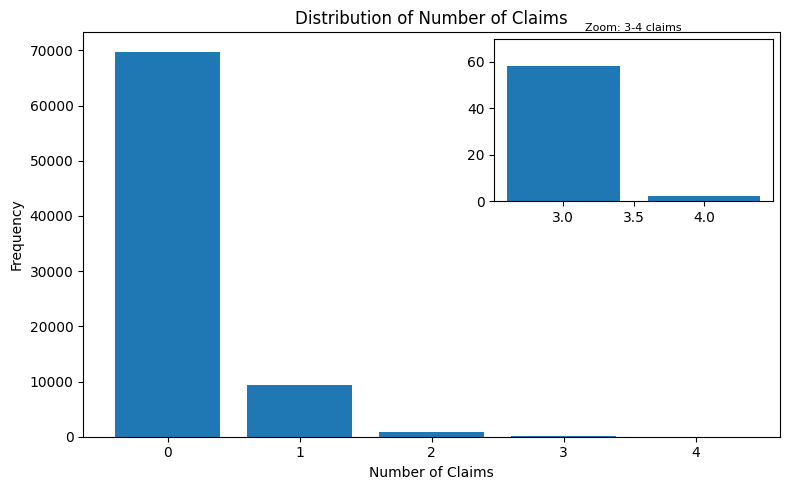

In [107]:
import matplotlib.pyplot as plt

counts = df['claims'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 5))

# Main bar plot
ax.bar(counts.index, counts.values)
ax.set_xlabel("Number of Claims")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Number of Claims")

# --- Inset axes ---
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Position inset inside main plot
axins = inset_axes(ax, width="40%", height="40%", loc="upper right")

# Plot zoomed range (claims 1–4)
zoom_counts = counts[counts.index.isin([3,4])]
axins.bar(zoom_counts.index, zoom_counts.values)

axins.set_title("Zoom: 3-4 claims", fontsize=8)

# Make y-axis scale smaller
axins.set_ylim(0, zoom_counts.max()*1.2)

plt.tight_layout()
plt.show()


In [98]:
df_2 = pd.get_dummies(df, columns=["province", "carcolour"], drop_first=True)
bool_cols = df_2.select_dtypes(include=["bool"]).columns
df_2[bool_cols] = df_2[bool_cols].astype(int)


df_3 = df.drop(columns=["province"])
df_3 = pd.get_dummies(df_3, columns=["carcolour"], drop_first=True)
bool_cols = df_3.select_dtypes(include=["bool"]).columns
df_3[bool_cols] = df_3[bool_cols].astype(int)

df_4 = df.drop(columns=["carcolour", "province"])

df_5 = df_4.drop(columns=["hp"])

X = df_5.drop(columns=["claims"])
y = df_4["claims"] 

In [99]:
X.head()
# normalize continuous variables
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X[["hp", "lic_years", "age"]] = scaler.fit_transform(X[["hp", "lic_years", "age"]])
X.head()

,gender,age,lic_years,pastclaims,exp_years
id,,,,,
1,0,18,0,0,0.005476
2,0,81,63,1,0.616016
3,0,54,35,1,0.919918
4,0,39,21,1,0.361396
5,0,54,35,0,1.160849


In [100]:
y.head()

id
1    0
2    0
3    1
4    0
5    0
Name: claims, dtype: int64

In [101]:
#X_new = X.drop(columns=["hp", "lic_years"])
X_new = X 
data = pd.concat([X, y], axis=1)
data.head()
#X_new = X_new.drop(columns=["gender", "age", "pastclaims"])
#split data into train and test
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=42, shuffle=True)
#data = pd.concat([X_train, y_train], axis=1)
#data.head()

,gender,age,lic_years,pastclaims,exp_years,claims
id,,,,,,
1,0,18,0,0,0.005476,0
2,0,81,63,1,0.616016,0
3,0,54,35,1,0.919918,1
4,0,39,21,1,0.361396,0
5,0,54,35,0,1.160849,0


In [102]:
model = smf.poisson("claims ~ " + " + ".join(X_new.columns), data=data).fit()

Optimization terminated successfully.
         Current function value: 0.405872
         Iterations 6


In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                 claims   No. Observations:                80000
Model:                        Poisson   Df Residuals:                    79994
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                 0.04271
Time:                        15:12:46   Log-Likelihood:                -32470.
converged:                       True   LL-Null:                       -33918.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1329      0.283     -7.549      0.000      -2.687      -1.579
gender         0.1110      0.019      5.872      0.000       0.074       0.148
age           -0.0263      0.015     -1.730      0.084      -0.056       0.003
lic_years      0.0104      0.015      0.680      0.497      -0.019       0.040
pastclaims     0.0797      0.009      9.361      0.000       0.063       0.096
exp_years      1.0026      0.023     43.153      0.000       0.957       1.048
==============================================================================
"""

In [43]:
# predict on test set
test_data = pd.concat([X_test, y_test], axis=1)
test_data.head()
pred = model.predict(X_test)
pred.head()

id
48591    0.147786
45762    0.095994
77185    0.202088
73246    0.095775
48182    0.049067
dtype: float64

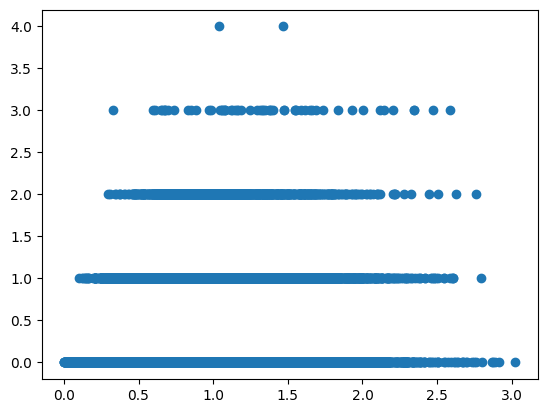

In [68]:
plt.scatter(data["exp_years"], data['claims'])

In [79]:
import statsmodels.api as sm
import numpy as np

X = sm.add_constant(data["pastclaims"])
y = data["claims"]

model = sm.GLM(y, X, family=sm.families.Poisson())
result = model.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 claims   No. Observations:                80000
Model:                            GLM   Df Residuals:                    79998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33876.
Date:                Wed, 19 Nov 2025   Deviance:                       46741.
Time:                        15:10:20   Pearson chi2:                 8.37e+04
No. Iterations:                     6   Pseudo R-squ. (CS):           0.001064
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0583      0.014   -148.217      0.0

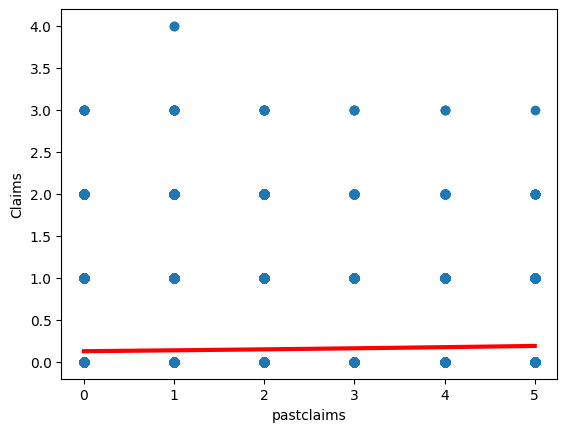

In [80]:
ages = np.linspace(data["pastclaims"].min(), data["pastclaims"].max(), 100)
X_pred = sm.add_constant(ages)
y_pred = result.predict(X_pred)

plt.scatter(data["pastclaims"], data["claims"], alpha=1)
plt.plot(ages, y_pred, linewidth=3, color='red')
plt.xlabel("pastclaims")
plt.ylabel("Claims")
plt.show()


In [46]:
error = np.subtract(y_test, pred)
error.mean()

np.float64(-0.00020046654600979185)

In [48]:
plt.scatter(error)
plt.xlabel('Residuals')
plt.axhline(0, color='red', linestyle='-')
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [37]:
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.glm(
    formula="claims ~ gender + age + pastclaims",
    data=data,
    family=sm.families.Poisson(),
    offset=np.log(data["exp_years"])
).fit()

print(model.summary())

pred = model.predict(data)   # gives expected number of claims
frequency = pred / data["exp_years"]


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 claims   No. Observations:                80000
Model:                            GLM   Df Residuals:                    79996
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32412.
Date:                Wed, 19 Nov 2025   Deviance:                       43813.
Time:                        14:43:37   Pearson chi2:                 8.11e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01519
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2377      0.026    -46.753      0.0

In [38]:
new = pd.DataFrame({
    "gender": [1],
    "age": [30],
    "pastclaims": [0],
    "exp_years": [1.0],
})

new["offset"] = np.log(new["exp_years"])

model.predict(new)


0    0.20037
dtype: float64

In [24]:
model = sm.GLM(
    y,
    X_new,
    family=sm.families.Gamma(link=sm.families.links.log())
).fit()

c:\Users\Armandt\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [25]:
model.summary()

c:\Users\Armandt\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
c:\Users\Armandt\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 claims   No. Observations:                80000
Model:                            GLM   Df Residuals:                    79996
Model Family:                   Gamma   Df Model:                            3
Link Function:                    log   Scale:                          8.7668
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Wed, 19 Nov 2025   Deviance:                   4.9738e+06
Time:                        14:38:34   Pearson chi2:                 7.01e+05
No. Iterations:                    24   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gender        -0.2093      0.020    -10.321      0.000      -0.249      -0.170
age           -0.0329      0.000    -81.782      0.000      -0.034      -0.032
pastclaims    -0.0607      0.010     -6.352      0.000      -0.079      -0.042
exp_years     -0.0418      0.023     -1.817      0.069      -0.087       0.003
==============================================================================
"""

In [ ]:
# One-hot encode categoricals
df = pd.get_dummies(df, columns=["province", "carcolour"], drop_first=True)
bool_cols = df.select_dtypes(include=["bool"]).columns
df[bool_cols] = df[bool_cols].astype(int)

# Response variable
y = df["claims"]

# Predictors (exclude 'id', 'claims', 'exp_years')
X = df.drop(columns=["id", "claims", "exp_years"])

# Add constant
X = sm.add_constant(X)

# Fit model with exposure offset
model = sm.GLM(
    y,
    X,
    family=sm.families.Poisson(),
    offset=np.log(df["exp_years"])
).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 claims   No. Observations:                80000
Model:                            GLM   Df Residuals:                    79980
Model Family:                 Poisson   Df Model:                           19
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32288.
Date:                Mon, 17 Nov 2025   Deviance:                       43565.
Time:                        08:41:10   Pearson chi2:                 8.09e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01824
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4256      0.285  

In [15]:
new_df = pd.read_csv("new_policies.csv")

In [16]:
new_df.head()


,id,province,carcolour,hp,gender,age,lic_years,pastclaims,exp_years
0,1,WC,White,218,1,29,11,2,0.481862
1,2,FS,White,189,0,27,8,2,0.232717
2,3,GP,Blue,166,1,31,13,0,0.169747
3,4,GP,Yellow,94,0,31,13,0,0.156057
4,5,MP,Blue,308,0,33,15,0,0.427105


In [17]:
new_df = pd.get_dummies(new_df, columns=["province", "carcolour"], drop_first=True)
bool_cols = new_df.select_dtypes(include=["bool"]).columns
new_df[bool_cols] = df[bool_cols].astype(int)

In [18]:
new_df.head()

,id,hp,gender,age,lic_years,pastclaims,exp_years,province_FS,province_GP,province_KZN,...,province_MP,province_NC,province_NW,province_WC,carcolour_Blue,carcolour_Green,carcolour_Red,carcolour_Silver,carcolour_White,carcolour_Yellow
0,1,218,1,29,11,2,0.481862,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,2,189,0,27,8,2,0.232717,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3,166,1,31,13,0,0.169747,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,4,94,0,31,13,0,0.156057,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,308,0,33,15,0,0.427105,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
X_new = new_df.drop(columns=["id", "exp_years"])
X_new = sm.add_constant(X_new)

In [20]:
X.head()

,const,hp,gender,age,lic_years,pastclaims,province_FS,province_GP,province_KZN,province_LIM,province_MP,province_NC,province_NW,province_WC,carcolour_Blue,carcolour_Green,carcolour_Red,carcolour_Silver,carcolour_White,carcolour_Yellow
0,1.0,74,0,18,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,1.0,283,0,81,63,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1.0,122,0,54,35,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.0,172,0,39,21,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,161,0,54,35,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [21]:
prediction = model.predict(X_new, offset=np.log(new_df["exp_years"]))

c:\Users\Armandt\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
prediction 

0        0.137353
1        0.056276
2        0.035942
3        0.023374
4        0.113807
           ...   
14547    0.040070
14548    0.048379
14549    0.069917
14550    0.043779
14551    0.004666
Name: exp_years, Length: 14552, dtype: float64

In [23]:
annual_frequency = prediction / new_df["exp_years"]


In [24]:
annual_frequency

0        0.285047
1        0.241820
2        0.211741
3        0.149780
4        0.266461
           ...   
14547    0.147832
14548    0.123570
14549    0.290197
14550    0.124923
14551    0.131109
Name: exp_years, Length: 14552, dtype: float64

In [27]:
simulated_claims = np.random.poisson(lam=prediction)
simulated_claims

array([0, 0, 0, ..., 0, 0, 0], shape=(14552,), dtype=int32)

In [34]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split

In [35]:
# new

# Response variable
y = df["claims"]

# Predictors (exclude 'id', 'claims', 'exp_years')
X = df.drop(columns=["id", "claims"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = PoissonRegressor(alpha=1, fit_intercept=True, max_iter=1000)
model.fit(X_train, y_train, sample_weight=df.loc[y_train.index, "exp_years"])
y_pred = model.predict(X_test)

In [36]:
#from sklearn.metrics import mean_poisson_deviance
    # y_true and y_pred are arrays of true and predicted counts
#mpd = mean_poisson_deviance(y_true, y_pred)
from sklearn.metrics import (
    mean_absolute_error,
    mean_poisson_deviance,
    mean_squared_error,
)

In [38]:
y_pred

array([0.20527501, 0.12798628, 0.21128533, ..., 0.1834419 , 0.12324621,
       0.07873606], shape=(16000,))

In [41]:
mean_absolute_error(y_test, y_pred)


0.2579646637688003

In [42]:
mean_squared_error(y_test, y_pred)


0.1475550255297249

In [43]:
mean_poisson_deviance(y_test, y_pred)

0.575143575686425